In [ ]:
import os
os.chdir('/home/bespi123/git/helmholtzCoilsDesigner')
print(os.getcwd())

In [ ]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot

In [ ]:
# Initialize coil parameters
number_of_spires = 4
size_length =  1.05 
distance_among_spires = 0.59
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.01
num_seg = 100           #Numer of segments 

In [ ]:
##Spawn spires
spire_x_s = X_coil.square_spires(num_seg)
#spire_x_s = X_coil.circular_spires(num_seg)
#spire_x_s = X_coil.polygonal_spires(num_seg)
#spire_x_s = X_coil.star_spires(num_seg)
print(np.shape(spire_x_s))
f0 = None
f0 = hplot.plot_spires(f0, spire_x_s, color='black', row=None, col=None)

f0.show()

In [ ]:
# Generar grid
X, Y, Z = sim.generate_range([-0.6, 0.6],[-0.6, 0.6], [-0.6, 0.6], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

In [ ]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, 1, spire_x_s, parallel_coils, batch_Size)
end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

# Save results in a CSV file
output_file = 'data/test1.csv'
x_coil_results_s.to_csv(output_file, index=False)

In [ ]:
# Read data from previous simulations
#x_coil_results_s = pd.read_csv('data/x_coil_results_square.csv')
x_coil_results_s = pd.read_csv('data/test1.csv')

reference_value:  4.566225691460755e-05


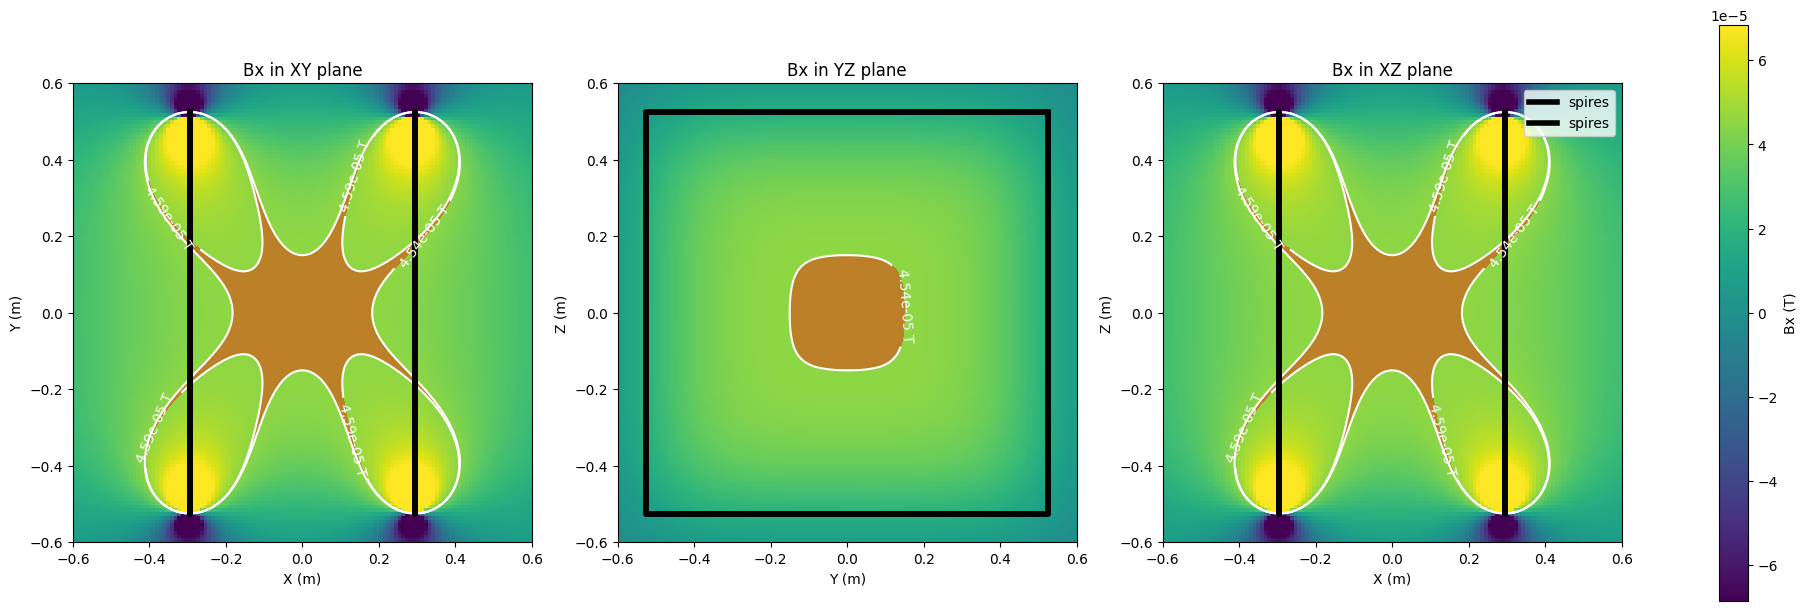

In [ ]:
# Print the Bx component
hplot.plot_2d_magnetic_field(x_coil_results_s, spire_x_s, index='Bx', use_fixed_zaxis=True)